In [67]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

#Scikit- Learn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import Normalizer

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#imputer
from sklearn.impute import SimpleImputer

In [68]:
height = pd.read_csv('heights.csv')
print(height.head())

diabete = pd.read_csv('pima-indians-diabetes.data.csv')
print(diabete.head())

usaarrests = pd.read_csv('USArrests.csv')
print(usaarrests.head())

births = pd.read_csv('daily-total-female-births.csv')
print(births.head())

College = pd.read_csv('College.csv')
print(College.head())

Auto = pd.read_csv('Auto.csv')
print(Auto.head())

   HEIGHT  GENDER
0    56.0  Female
1    57.0  Female
2    58.0  Female
3    60.0  Female
4    60.0  Female
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Class  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3                     0.167   21      0  
4                     2.288   33      1  
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8

## Selecionando colunas de características e coluna alvo
## Para a base usaarrests queremos predizer murder com base em urbanpop e assault

In [69]:
#coluna alvo
y = usaarrests[['Murder']] 

#colunas de características
X = usaarrests[['Assault','UrbanPop']]

print(y.shape)
print(X.shape)

(50, 1)
(50, 2)


## Dividindo a base em treino e teste
### train_test_split

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.1, shuffle=True) 
y_train, y_test = train_test_split(y, test_size=0.1, shuffle=True) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

print("X ",X_train.shape, X_test.shape, " y ", y_train.shape, y_test.shape)
print(X_train.head())
print(y_train.head())

X  (45, 2) (5, 2)  y  (45, 1) (5, 1)
    Assault  UrbanPop
31      254        86
8       335        80
21      255        74
6       110        77
38      174        87
    Murder
40     3.8
49     6.8
39    14.4
45     8.5
36     4.9


In [71]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabete, test_size=0.2, shuffle=True)

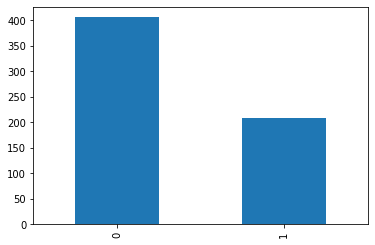

In [72]:
#strat_train_set['Class'].value_counts().plot(kind='bar')
train_set['Class'].value_counts().plot(kind='bar')

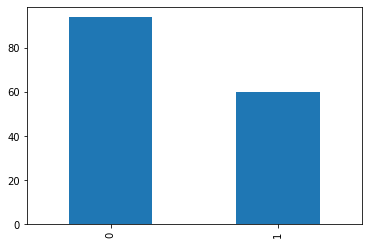

In [73]:
#strat_test_set['Class'].value_counts().plot(kind='bar')
test_set['Class'].value_counts().plot(kind='bar')

## Representando imagens como arrays

In [75]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## Encoder
### Codificando dados categoricos em números

In [76]:
# Objeto Labelencoder
le = preprocessing.LabelEncoder()

#convert categoricas para números
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

[1 1 2 0]


In [77]:
print(height.columns)
height['GENDER-cat']=le.fit_transform(height['GENDER'])

print(height['GENDER'])
print(height['GENDER-cat'])
print(height.describe())

Index(['HEIGHT', 'GENDER'], dtype='object')
0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
374      Male
375      Male
376      Male
377      Male
378      Male
Name: GENDER, Length: 379, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
374    1
375    1
376    1
377    1
378    1
Name: GENDER-cat, Length: 379, dtype: int64
           HEIGHT  GENDER-cat
count  379.000000  379.000000
mean    67.097625    0.308707
std      4.120502    0.462571
min     56.000000    0.000000
25%     64.000000    0.000000
50%     67.000000    0.000000
75%     70.000000    1.000000
max     92.000000    1.000000


## Scaling

### Mudando Escala de Valores
### Padronizar a escala minimiza potenciais problemas relacionados com diferença de grandezas entre valoes
#### Exemplo: peso e altura

### Min Max: define um range para que os dados sejam re-escalonados

In [78]:
# data values
X = [ [110, 200], [120, 800], [310, 400], [140, 900], [510, 200], [653, 400] ,[310, 880] ]

# transform data
scaler = MinMaxScaler(feature_range=(-1, 0))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
np.set_printoptions(precision=2)
print(rescaledX)
#print(rescaledX[0:6,:])

[[-1.00e+00 -1.00e+00]
 [-9.82e-01 -1.43e-01]
 [-6.32e-01 -7.14e-01]
 [-9.45e-01  2.22e-16]
 [-2.63e-01 -1.00e+00]
 [ 2.22e-16 -7.14e-01]
 [-6.32e-01 -2.86e-02]]


### Standandard: range de valores é definida com base no intervalo da base

In [79]:
# data values
X = [ [110, 200], [120, 800], [310, 400], [140, 900], [510, 200], [653, 400] ,[310, 880] ]

# scaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:6,:])

[[-1.02  -1.178]
 [-0.968  0.901]
 [ 0.013 -0.485]
 [-0.865  1.247]
 [ 1.045 -1.178]
 [ 1.783 -0.485]]


## Visualizando mudança de escala

<class 'numpy.ndarray'>
1.2588099793049041
1.1058277369805274
1.4117922216292809
0.15298224232437674
165.13333333333333
45
335
81.27020028611629


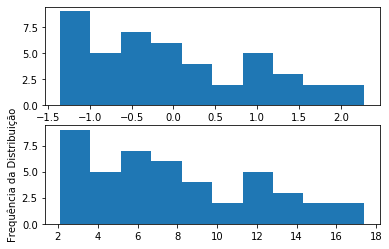

In [84]:
# transform data
scaler = StandardScaler().fit(y_train)
#scaler = Normalizer().fit(y_train)
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = MaxAbsScaler(y_train)

#rescaledX = scaler.fit_transform(X_train)
rescaledy = scaler.fit_transform(y_train)

print(type(rescaledX))
print(rescaledX[0].mean())
print(rescaledX[0].min())
print(rescaledX[0].max())
print(rescaledX[0].std())

print(X_train['Assault'].mean())
print(X_train['Assault'].min())
print(X_train['Assault'].max())
print(X_train['Assault'].std())

fig, ax_lst = plt.subplots(2, 1)

plt.ylabel('Frequência da Distribuição')

ax_lst[0].hist(rescaledy, 10 )
ax_lst[1].hist(y_train['Murder'], 10 )


plt.show()

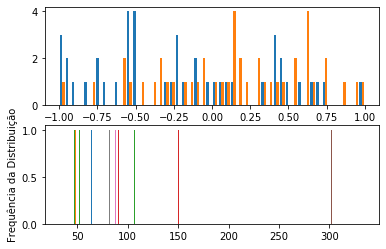

In [92]:
# transform data
#scaler = StandardScaler().fit(X_train)
#scaler = Normalizer().fit(y_train)
scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MaxAbsScaler(y_train)

rescaledX = scaler.fit_transform(X_train)


fig, ax_lst = plt.subplots(2, 1)

plt.ylabel('Frequência da Distribuição')

ax_lst[0].hist(rescaledX[1:], 50 )
ax_lst[1].hist(X_train[1:], 50 )


plt.show()

## Imputer

### Substitui dados faltantes

In [17]:

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.  2. ]
 [6.  3.7]
 [7.  6. ]]
